In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import string

import itertools

import seaborn as sns
import math
import nltk
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import cosine_similarity
from nltk import sent_tokenize , word_tokenize

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV
 

from bs4 import BeautifulSoup

import re
# import sys
# from importlib import reload
# reload(sys)
# sys.setdefaultencoding("ISO-8859-1")
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix

from sklearn import preprocessing

from sklearn.svm import SVC

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold

In [2]:
Npath ='/home/sukrit/Desktop/BBC News Summary/News Articles/**/**'
Spath = '/home/sukrit/Desktop/BBC News Summary/Summaries/**/**'

Nfiles = glob.glob(Npath)
Sfiles = glob.glob(Spath)

In [3]:
# list of text files
NF=[]
for i in Nfiles:
#     print(i)
    f = open(i ,'r',encoding="utf8" ,errors='ignore') 
    sen = f.read()
    NF.append(sen)
    
SF=[]
for j in Sfiles:
#     print(i)
    f = open(j ,'r') 
    sen = f.read()
    SF.append(sen)

In [4]:
dnews = pd.DataFrame(NF,columns=['news'])

In [5]:
dsumm = pd.DataFrame(SF,columns=['summ'])

In [6]:
data = pd.concat([dnews , dsumm],axis=1)

In [7]:
pd.set_option('display.max_colwidth', -1)
data.head(1)

,news,summ
0,"Call for Kenteris to be cleared\n\nKostas Kenteris' lawyer has called for the doping charges against the Greek sprinter to be dropped.\n\nGregory Ioannidis has submitted new evidence to a Greek athletics tribunal which he claims proves the former Olympic champion has no case to answer. Kenteris and compatriot Katerina Thanou were given provisional suspensions in December for failing to take drugs tests before the Athens Olympics. The Greek tribunal is expected to give its verdict early next week. Kenteris and Thanou withdrew from the Athens Olympics last August after missing drugs tests on the eve of the opening ceremony. They were also alleged to have avoided tests in Tel Aviv and Chicago before the Games.\n\nBut Ioannidis said: ""Everything overwhelmingly shows that the charges should be dropped."" Ioannidis also said he has presented evidence that will throw a different light on the events leading up to the pair's sensational withdrawal from the Athens Games. The lawyer added that he has proof the authorities ""knew"" Kenteris was in Germany at the time he was alleged to have missed a test in Chicago. Nick Davies, spokesman for athletics' ruling body the IAAF, which handed out the provisional bans, said: ""We can't comment because we were not present at the hearing and don't know what was said behind closed doors. ""We expect a verdict from the Greek Athletics Federation before the end of February and will obviously be making a statement then."" Kenteris won 200m gold at the 2000 Sydney Olympics, while Thanou won silver in the 100m.\n","Kostas Kenteris' lawyer has called for the doping charges against the Greek sprinter to be dropped.Kenteris and compatriot Katerina Thanou were given provisional suspensions in December for failing to take drugs tests before the Athens Olympics.Kenteris and Thanou withdrew from the Athens Olympics last August after missing drugs tests on the eve of the opening ceremony.The lawyer added that he has proof the authorities ""knew"" Kenteris was in Germany at the time he was alleged to have missed a test in Chicago.Gregory Ioannidis has submitted new evidence to a Greek athletics tribunal which he claims proves the former Olympic champion has no case to answer."


In [8]:
data = data.applymap(lambda text: BeautifulSoup(text).get_text())
data1 = pd.DataFrame(data['news'] , columns = ['news'])
data1['news'] = data1["news"].str.lower()

/home/sukrit/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/sukrit/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [9]:
data1['news'] = data1['news'].apply(lambda text: text.replace('\n','. ').replace('\\','').split('. '))
data1['news'] = data1['news'].apply(lambda text: list(filter(None, text)))

In [10]:
data1['news'].shape

(2225,)

In [11]:


# removing punctuation

data['news'] = data['news'].apply(lambda x:''.join([i for i in x 
                                                  if i not in string.punctuation]))



In [12]:
data = data.applymap(lambda text: re.sub('[^a-zA-Z0-9 !?$%£]',' ',text))


In [13]:
data['tryvec'] = data['news']

In [14]:
data["news"] = data["news"].str.lower()
data["summ"] = data["summ"].str.lower()


In [15]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/sukrit/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
stop_words=stopwords.words('english')

In [17]:
data = data.applymap(lambda text: text.split())

In [18]:


# wait for few seconds

data = data.applymap(lambda x: [item for item in x if item not in stop_words])
# data['summ'] = data['summ'].apply(lambda x: [item for item in x if item not in stop_words])



In [19]:
# convertting rows to string
data = data.applymap(lambda x:' '.join(x))

In [20]:

data['news']= data['news'].apply(lambda x: nltk.word_tokenize(str(x)))

In [21]:
data['onews'] = data1['news']

In [22]:
data2 = pd.DataFrame(data1['news'])

data2.rename(columns = {'news':'newswdttl'} , inplace=True)

In [23]:

data['Title'] = data['onews'].apply(lambda x: x[0])
data['onews'].apply(lambda x: x.pop(0))
# data.head()

# data['summ'] = data['summ'].apply(lambda x: [item for item in x if item not in stop_words])


0       call for kenteris to be cleared  
1       worcester v sale (fri)           
2       robinson ready for difficult task
3       roddick in talks over new coach  
4       davenport hits out at wimbledon  
5       injury sidelines philippoussis   
6       sydney to host north v south game
7       spain coach faces racism inquiry 
8       wenger handed summer war chest   
9       rochus shocks coria in auckland  
10      henman to face saulnier test     
11      2004: an irish athletics year    
12      boro suffer morrison injury blow 
13      celts savour grand slam prospect 
14      beattie return calms attack fears
15      mansfield 0-1 leyton orient      
16      classy henman makes winning start
17      mexicans tracking unhappy juninho
18      downing injury mars uefa victory 
19      london irish 19-33 wasps         
20      wru proposes season overhaul     
21      holmes starts 2005 with gb events
22      double injury blow strikes wales 
23      pearce keen on succeeding 

In [24]:
# removing stopwords froom title


def getspiltd(s):
    return s.split(' ')

data['Titleoutstop'] = data['Title'].apply(lambda x : [item for item in getspiltd(x) if item not in stop_words])

In [25]:
# creating vectorizer
vectorizer = CountVectorizer()

# x = vectorizer.fit_transform(data['onews'][0])
data['convec'] = data['onews'].apply(lambda x : vectorizer.fit_transform(x))

In [26]:
print(data['convec'][0][0,:].toarray())

[[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0
  0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0
  0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 1 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [27]:
print(vectorizer.get_feature_names())

['about', 'accusations', 'added', 'afford', 'allow', 'already', 'amazon', 'and', 'angry', 'are', 'as', 'austrian', 'based', 'been', 'big', 'business', 'but', 'cannot', 'case', 'changed', 'claim', 'claimed', 'clashed', 'click', 'com', 'companies', 'computer', 'consider', 'controversial', 'costs', 'could', 'critics', 'crucial', 'currently', 'debate', 'decide', 'delays', 'developments', 'directive', 'due', 'especially', 'eu', 'european', 'eva', 'excludes', 'exclusively', 'favour', 'firms', 'for', 'from', 'green', 'happens', 'harmonise', 'has', 'have', 'hold', 'holds', 'ideas', 'ignited', 'implemented', 'in', 'inflict', 'innovative', 'instance', 'interests', 'internet', 'intervention', 'inventions', 'inventors', 'is', 'issue', 'it', 'large', 'last', 'law', 'legal', 'lichtenberg', 'little', 'massive', 'member', 'methods', 'ministers', 'minute', 'more', 'needed', 'new', 'of', 'on', 'one', 'ones', 'open', 'over', 'parliament', 'patent', 'patentability', 'patenting', 'phrasing', 'planned', 'po

In [28]:
tfidf = TfidfVectorizer(ngram_range=(1,1), token_pattern='(?u)\\b\\w+\\b', smooth_idf=False)



data['tfidf'] = data['onews'].apply(lambda x : tfidf.fit_transform(x))
# tfs = tfidf.fit_transform(corpus.values())
# new_tfs = normalized_counts.multiply(tfidf.idf_)

In [29]:
data['sentimport'] = data['tfidf'].apply(lambda i: i.sum(axis=1) )

In [30]:
data['sentimport'][0]

matrix([[ 3.74950761],
        [ 4.57033639],
        [ 4.40606926],
        [ 3.31993883],
        [ 4.26472629],
        [ 3.85236124],
        [ 5.61217119],
        [ 4.50175543],
        [ 5.53487084],
        [ 5.49288328]])

In [31]:
dsumm['summ'][0]

'Kostas Kenteris\' lawyer has called for the doping charges against the Greek sprinter to be dropped.Kenteris and compatriot Katerina Thanou were given provisional suspensions in December for failing to take drugs tests before the Athens Olympics.Kenteris and Thanou withdrew from the Athens Olympics last August after missing drugs tests on the eve of the opening ceremony.The lawyer added that he has proof the authorities "knew" Kenteris was in Germany at the time he was alleged to have missed a test in Chicago.Gregory Ioannidis has submitted new evidence to a Greek athletics tribunal which he claims proves the former Olympic champion has no case to answer.'

In [32]:
def lensentn(sent):
    return len(sent.split(' '))

In [33]:
data['snlen'] = data['onews'].apply(lambda x: [lensentn(i) for i in x])

In [34]:
data.head(3)

,news,summ,tryvec,onews,Title,Titleoutstop,convec,tfidf,sentimport,snlen
0,"[call, kenteris, cleared, kostas, kenteris, lawyer, called, doping, charges, greek, sprinter, dropped, gregory, ioannidis, submitted, new, evidence, greek, athletics, tribunal, claims, proves, former, olympic, champion, case, answer, kenteris, compatriot, katerina, thanou, given, provisional, suspensions, december, failing, take, drugs, tests, athens, olympics, greek, tribunal, expected, give, verdict, early, next, week, kenteris, thanou, withdrew, athens, olympics, last, august, missing, drugs, tests, eve, opening, ceremony, also, alleged, avoided, tests, tel, aviv, chicago, games, ioannidis, said, everything, overwhelmingly, shows, charges, dropped, ioannidis, also, said, presented, evidence, throw, different, light, events, leading, pairs, sensational, withdrawal, athens, games, lawyer, added, proof, authorities, knew, kenteris, germany, time, ...]",kostas kenteris lawyer called doping charges greek sprinter dropped kenteris compatriot katerina thanou given provisional suspensions december failing take drugs tests athens olympics kenteris thanou withdrew athens olympics last august missing drugs tests eve opening ceremony lawyer added proof authorities knew kenteris germany time alleged missed test chicago gregory ioannidis submitted new evidence greek athletics tribunal claims proves former olympic champion case answer,Call Kenteris cleared Kostas Kenteris lawyer called doping charges Greek sprinter dropped Gregory Ioannidis submitted new evidence Greek athletics tribunal claims proves former Olympic champion case answer Kenteris compatriot Katerina Thanou given provisional suspensions December failing take drugs tests Athens Olympics The Greek tribunal expected give verdict early next week Kenteris Thanou withdrew Athens Olympics last August missing drugs tests eve opening ceremony They also alleged avoided tests Tel Aviv Chicago Games But Ioannidis said Everything overwhelmingly shows charges dropped Ioannidis also said presented evidence throw different light events leading pairs sensational withdrawal Athens Games The lawyer added proof authorities knew Kenteris Germany time alleged missed test Chicago Nick Davies spokesman athletics ruling body IAAF handed provisional bans said We cant comment present hearing dont know said behind closed doors We expect verdict Greek Athletics Federation end February obviously making statement Kenteris 200m gold 2000 Sydney Olympics Thanou silver 100m,"[kostas kenteris' lawyer has called for the doping charges against the greek sprinter to be dropped., gregory ioannidis has submitted new evidence to a greek athletics tribunal which he claims proves the former olympic champion has no case to answer, kenteris and compatriot katerina thanou were given provisional suspensions in december for failing to take drugs tests before the athens olympics, the greek tribunal is expected to give its verdict early next week, kenteris and thanou withdrew from the athens olympics last august after missing drugs tests on the eve of the opening ceremony, they were also alleged to have avoided tests in tel aviv and chicago before the games., but ioannidis said: ""everything overwhelmingly shows that the charges should be dropped."" ioannidis also said he has presented evidence that will throw a different light on the events leading up to the pair's sensational withdrawal from the athens games, the lawyer added that he has proof the authorities ""knew"" kenteris was in germany at the time he was alleged to have missed a test in chicago, nick davies, spokesman for athletics' ruling body the iaaf, which handed out the provisional bans, said: ""we can't comment because we were not present at the hearing and don't know what was said behind closed doors, ""we expect a verdict from the greek athletics federation before the end of february and will obviously be making a statement then."" kenteris won 200m gold at the 2000 sydney olympics,

In [35]:
#Converting array to list
data['sentimport'] = data['sentimport'].apply(lambda x: x.tolist())

In [36]:
#Coonverting list of list to single list
data['sentimport'] = data['sentimport'].apply(lambda x : list(itertools.chain(*x)))

In [37]:

data['sentimport_mean'] = data.apply(lambda x: [np.divide(x.sentimport, x.snlen)], axis=1)

In [38]:
# svec = CountVectorizer()
    
# sentvec = svec.fit_transform(title,a)
# # simlarity = cosine_similarity(title ,a)
# sentvec.toarray()

In [39]:
def spltsentn(sent , title):
    svec = CountVectorizer()
    sent.append(title)
    
    
    sentvec = svec.fit_transform(sent)
    return(cosine_similarity(sentvec[-1] ,sentvec[:-1]))

In [40]:
data['sentsimilarity'] = data.apply(lambda x: [spltsentn(x.onews,x.Title)], axis=1)

In [41]:
# data1 = pd.DataFrame({ col:np.repeat(data[col].values, data['news',''].str.len()) for col in data.columns.difference(['news']) }).assign(**{'news':np.concatenate(data['news'].values)})[data.columns.tolist()]

In [42]:
datafinal = data[['onews','summ','Title','sentimport_mean','snlen','sentsimilarity']].copy()
datafinal['summ'] = dsumm['summ']

In [43]:
datafinal.head()

,onews,summ,Title,sentimport_mean,snlen,sentsimilarity
0,"[kostas kenteris' lawyer has called for the doping charges against the greek sprinter to be dropped., gregory ioannidis has submitted new evidence to a greek athletics tribunal which he claims proves the former olympic champion has no case to answer, kenteris and compatriot katerina thanou were given provisional suspensions in december for failing to take drugs tests before the athens olympics, the greek tribunal is expected to give its verdict early next week, kenteris and thanou withdrew from the athens olympics last august after missing drugs tests on the eve of the opening ceremony, they were also alleged to have avoided tests in tel aviv and chicago before the games., but ioannidis said: ""everything overwhelmingly shows that the charges should be dropped."" ioannidis also said he has presented evidence that will throw a different light on the events leading up to the pair's sensational withdrawal from the athens games, the lawyer added that he has proof the authorities ""knew"" kenteris was in germany at the time he was alleged to have missed a test in chicago, nick davies, spokesman for athletics' ruling body the iaaf, which handed out the provisional bans, said: ""we can't comment because we were not present at the hearing and don't know what was said behind closed doors, ""we expect a verdict from the greek athletics federation before the end of february and will obviously be making a statement then."" kenteris won 200m gold at the 2000 sydney olympics, while thanou won silver in the 100m., call for kenteris to be cleared]","Kostas Kenteris' lawyer has called for the doping charges against the Greek sprinter to be dropped.Kenteris and compatriot Katerina Thanou were given provisional suspensions in December for failing to take drugs tests before the Athens Olympics.Kenteris and Thanou withdrew from the Athens Olympics last August after missing drugs tests on the eve of the opening ceremony.The lawyer added that he has proof the authorities ""knew"" Kenteris was in Germany at the time he was alleged to have missed a test in Chicago.Gregory Ioannidis has submitted new evidence to a Greek athletics tribunal which he claims proves the former Olympic champion has no case to answer.",call for kenteris to be cleared,"[[0.234344225338, 0.190430682881, 0.20981282196, 0.276661569213, 0.20308220413, 0.24077257752, 0.143901825268, 0.166731682414, 0.153746412319, 0.144549559902]]","[16, 24, 21, 12, 21, 16, 39, 27, 36, 38]","[[[0.38490017946, 0.157134840264, 0.267261241912, 0.117851130198, 0.0785674201318, 0.102062072616, 0.109108945118, 0.132453235707, 0.0601929265429, 0.115470053838]]]"
1,"[sixways, friday, 25 february, 2000 gmt, they make just one change, with tim collier replacing phil murphy in the second row, in contrast, sale are missing 14 players due to a combination of international call-ups and injuries, john payne and chris rhys jones come into the centres while scrum-half richard wigglesworth looks set to play on the wing., delport; pieters, rasmussen, lombard, o'leary; brown, powell; windo, van niekerk, horsman; collier, gillies; hickey, sanderson, macleod- henderson., replacements: fortey, murphy, daly, vaili, cole, hayes, trueman., hanley; mayor, payne, rhys jones, wigglesworth; hercus, redpath (capt); turner, roddam, stewart; day, schofield; caillet, carter, chabal., replacements (from): bozzi, coutts, anglesea, lund, martens, riley, duffy, c jones., worcester v sale (fri)]","John Payne and Chris Rhys Jones come into the centres while scrum-half Richard Wigglesworth looks set to play on the wing.Hanley; Mayor, Payne, Rhys Jones, Wigglesworth; Hercus, Redpath (capt); Turner, Roddam, Stewart; Day, Schofield; Caillet, Carter, Chabal.Replacements (from): Bozzi, Coutts, Anglesea, Lund, Martens, Riley, Duffy, C Jones.",worcester v sale (fri),"[[1.0, 0.57735026919, 0.707106781187, 0.256960008915, 0.25680917211, 0.214726076699, 0.249272371142, 0.35193829062, 0.24104

In [44]:
# Converting array to list
datafinal['sentimport_mean'] = datafinal['sentimport_mean'].apply(lambda x: x[0].tolist())
# datafinal['sentimport_mean'] = datafinal['sentimport_mean'].apply(lambda x : list(itertools.chain(*x)))
datafinal['sentsimilarity'] = datafinal['sentsimilarity'].apply(lambda x: x[0].tolist())
datafinal['sentsimilarity'] = datafinal['sentsimilarity'].apply(lambda x : list(itertools.chain(*x)))

In [45]:
datafinal['sentimport_mean'][0]

[0.23434422533760818,
 0.19043068288149909,
 0.20981282195983314,
 0.2766615692127472,
 0.20308220412983172,
 0.24077257751989953,
 0.14390182526787607,
 0.16673168241375358,
 0.15374641231862948,
 0.14454955990218088]

In [46]:
datafinal.tail()

,onews,summ,Title,sentimport_mean,snlen,sentsimilarity
2220,"[the luxury cruise liner crystal harmony, currently in the gulf of mexico, is the unlikely setting for tests of biometric technology., as holidaymakers enjoy balmy breezes, their ship's crew is testing prototype versions of the world's first internationally issued biometric id cards, the seafarer's equivalent of a passport, along with the owner's picture, name and personal details, the new seafarers' identity document incorporates a barcode representing unique features of its holder's fingerprints, the cards are due to be issued in february next year, in line with the revised un convention on seafarers' identity documents of june 2003, tests currently under way in the caribbean are designed to ensure that new cards and their machine readers, produced by different companies in different countries, are working to interoperable standards, results of the current tests, which involve seafarers from a wide range of occupations and nationalities, will be published by the international labour organisation (ilo) by the end of november, crystal cruises, which operates the crystal harmony, is exploring the use of biometrics but has not yet committed to the technology., authenti-corp, the us technology consultancy, has been working with the ilo on its technical specifications for the cards., ""if you're issued a seafarer's id in your country, you want to be sure that when the ship lands in a port in, say, my country you can validate yourself using whatever equipment we have installed,"" authenti-corp's ceo, cynthia musselman, told the bbc's go digital programme, she said french, jordanian and nigerian nationals would be the first seafarers to get the new id cards since their countries have already ratified the convention, it aims to combat international terrorism whilst guaranteeing the welfare the one million seafarers estimated to be at sea, the convention highlights the importance of access to shore facilities and shore leave as vital elements to a sailor's wellbeing and, therefore, it says, to safer shipping and cleaner oceans, ""by increasing security on the seas as well as border control and protection, the cards will hopefully reduce the number of piracy problems around the world,"" said ms musselman, ""it should be a safer environment for seafarers to work in, and will allow people protecting their borders to have confidence that the people getting off the ship are, in fact, seafarers."", seamen sail into biometric future]","She said French, Jordanian and Nigerian nationals would be the first seafarers to get the new ID cards since their countries have already ratified the convention.The cards are due to be issued in February next year, in line with the revised UN Convention on Seafarers' Identity Documents of June 2003.""It should be a safer environment for seafarers to work in, and will allow people protecting their borders to have confidence that the people getting off the ship are, in fact, seafarers.""As holidaymakers enjoy balmy breezes, their ship's crew is testing prototype versions of the world's first internationally issued biometric ID cards, the seafarer's equivalent of a passport.""If you're issued a seafarer's ID in your country, you want to be sure that when the ship lands in a port in, say, my country you can validate yourself using whatever equipment we have installed,"" Authenti-corp's CEO, Cynthia Musselman, told the BBC's Go Digital programme.The luxury cruise liner Crystal Harmony, currently in the Gulf of Mexico, is the unlikely setting for tests of biometric technology.",seamen sail into biometric future,"[0.1994120758533141, 0.18097675005461225, 0.19779990045678505, 0.18473283048601652, 0.16034955448781255, 0.16153416595837458, 0.19435834623610293, 0.22594323240916678, 0.13006222123874628, 0.18261056966078842, 0.21233298116718097, 0.15842544302454326, 0.1677335797869614, 0.15374343242210203]","[21, 27, 24, 25, 30, 30, 21, 18, 46, 26, 19, 30, 29, 3

In [47]:
# data1 = pd.DataFrame({ col:np.repeat(data[col].values, data['news'].str.len()) for col in data.columns.difference(['news']) }).assign(**{'news':np.concatenate(data['news'].values)})[data.columns.tolist()]

In [48]:
dataonews = datafinal[['onews','Title']].copy()
datasentimport = datafinal[['sentimport_mean','summ']].copy()
dataselen = datafinal[['snlen','summ']].copy()
datasimil = datafinal[['sentsimilarity','summ']].copy()

In [49]:
dataonews = pd.DataFrame({ col:np.repeat(dataonews[col].values, dataonews['onews'].str.len()) for col in dataonews.columns.difference(['onews']) }).assign(**{'onews':np.concatenate(dataonews['onews'].values)})[dataonews.columns.tolist()]
datasentimport = pd.DataFrame({ col:np.repeat(datasentimport[col].values, datasentimport['sentimport_mean'].str.len()) for col in datasentimport.columns.difference(['sentimport_mean']) }).assign(**{'sentimport_mean':np.concatenate(datasentimport['sentimport_mean'].values)})[datasentimport.columns.tolist()]
dataselen = pd.DataFrame({ col:np.repeat(dataselen[col].values, dataselen['snlen'].str.len()) for col in dataselen.columns.difference(['snlen']) }).assign(**{'snlen':np.concatenate(dataselen['snlen'].values)})[dataselen.columns.tolist()]
datasimil = pd.DataFrame({ col:np.repeat(datasimil[col].values, datasimil['sentsimilarity'].str.len()) for col in datasimil.columns.difference(['sentsimilarity']) }).assign(**{'sentsimilarity':np.concatenate(datasimil['sentsimilarity'].values)})[datasimil.columns.tolist()]

In [50]:
dataonews.drop(dataonews[dataonews['onews'] == dataonews['Title']].index, inplace = True)
# dataonews = dataonews.dropna()
dataonews = dataonews.reset_index(drop = True)

In [51]:
dataonews.shape

(39553, 2)

In [52]:
dataonews.shape,datasentimport.shape,dataselen.shape,dataselen.shape

((39553, 2), (39553, 2), (39553, 2), (39553, 2))

In [53]:
dataonews.tail()

,onews,Title
39548,"critics claim the law, which the eu says is needed to harmonise with the us, is little more than a law on ideas",eu software patent law delayed
39549,"""patent rights, it is claimed, protect inventors but in this case it is exclusively the interests of the big companies that are protected,"" eva lichtenberg, a austrian green member of the european parliament said in a statement",eu software patent law delayed
39550,"""smaller, innovative firms cannot afford the patenting and legal costs that the directive would inflict on them,"" she added",eu software patent law delayed
39551,the european parliament has already clashed with the european union on the issue and there have been accusations that the process to decide the issue has been undemocratic,eu software patent law delayed
39552,the directive has been subject to several previous delays.,eu software patent law delayed


In [54]:
finaldata = pd.concat([dataonews,datasentimport,dataselen['snlen'],datasimil['sentsimilarity']],1)
finaldata['summ'] = finaldata['summ'].str.lower()

In [55]:
finaldata.head(20)

,onews,Title,sentimport_mean,summ,snlen,sentsimilarity
0,kostas kenteris' lawyer has called for the doping charges against the greek sprinter to be dropped.,call for kenteris to be cleared,0.234344,"kostas kenteris' lawyer has called for the doping charges against the greek sprinter to be dropped.kenteris and compatriot katerina thanou were given provisional suspensions in december for failing to take drugs tests before the athens olympics.kenteris and thanou withdrew from the athens olympics last august after missing drugs tests on the eve of the opening ceremony.the lawyer added that he has proof the authorities ""knew"" kenteris was in germany at the time he was alleged to have missed a test in chicago.gregory ioannidis has submitted new evidence to a greek athletics tribunal which he claims proves the former olympic champion has no case to answer.",16,0.384900
1,gregory ioannidis has submitted new evidence to a greek athletics tribunal which he claims proves the former olympic champion has no case to answer,call for kenteris to be cleared,0.190431,"kostas kenteris' lawyer has called for the doping charges against the greek sprinter to be dropped.kenteris and compatriot katerina thanou were given provisional suspensions in december for failing to take drugs tests before the athens olympics.kenteris and thanou withdrew from the athens olympics last august after missing drugs tests on the eve of the opening ceremony.the lawyer added that he has proof the authorities ""knew"" kenteris was in germany at the time he was alleged to have missed a test in chicago.gregory ioannidis has submitted new evidence to a greek athletics tribunal which he claims proves the former olympic champion has no case to answer.",24,0.157135
2,kenteris and compatriot katerina thanou were given provisional suspensions in december for failing to take drugs tests before the athens olympics,call for kenteris to be cleared,0.209813,"kostas kenteris' lawyer has called for the doping charges against the greek sprinter to be dropped.kenteris and compatriot katerina thanou were given provisional suspensions in december for failing to take drugs tests before the athens olympics.kenteris and thanou withdrew from the athens olympics last august after missing drugs tests on the eve of the opening ceremony.the lawyer added that he has proof the authorities ""knew"" kenteris was in germany at the time he was alleged to have missed a test in chicago.gregory ioannidis has submitted new evidence to a greek athletics tribunal which he claims proves the former olympic champion has no case to answer.",21,0.267261
3,the greek tribunal is expected to give its verdict early next week,call for kenteris to be cleared,0.276662,"kostas kenteris' lawyer has called for the doping charges against the greek sprinter to be dropped.kenteris and compatriot katerina thanou were given provisional suspensions in december for failing to take drugs tests before the athens olympics.kenteris and thanou withdrew from the athens olympics last august after missing drugs tests on the eve of the opening ceremony.the lawyer added that he has proof the authorities ""knew"" kenteris was in germany at the time he was alleged to have missed a test in chicago.gregory ioannidis has submitted new evidence to a greek athletics tribunal which he claims proves the former olympic champion has no case to answer.",12,0.117851
4,kenteris and thanou withdrew from the athens olympics last august after missing drugs tests on the eve of the opening ceremony,call for kenteris to be cleared,0.203082,"kostas kenteris' lawyer has called for the doping charges against the greek sprinter to be dropped.kenteris and compatriot katerina thanou were given provisional suspensions in december for failing to take drugs tests before the athens olympics.kenteris and thanou withdrew from the athens olympics last august after missing drugs tests on the eve of the opening ceremony.the lawyer added that he has proof the authorities ""

In [56]:
finaldata['exist'] = finaldata.apply(lambda x : x.onews in x.summ  , axis = 1)

In [57]:
X = finaldata[['sentimport_mean','snlen','sentsimilarity']]

In [58]:
Y = finaldata['exist']

In [59]:
# spilting data and creating train validation and test set and accuracy function

kf = KFold(n_splits=70, random_state=None, shuffle=False)

for train_index, test_index in kf.split(X):
#     print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_valid = X.iloc[train_index], X.iloc[test_index]
    y_train, y_valid = Y.iloc[train_index], Y.iloc[test_index]

def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), 
           rmse(m.predict(X_valid), y_valid), m.score(X_train, y_train), 
          m.score(X_valid, y_valid)]
    
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    return(res)





In [60]:
# it will take 6 minutes
# clf = SVC(gamma='auto')
# clf.fit(X_train, y_train)
# print_score(clf)

/home/sukrit/anaconda3/lib/python3.6/site-packages/pandas/core/computation/expressions.py:183: UserWarning: evaluating in Python space because the '-' operator is not supported by numexpr for the bool dtype, use '^' instead
  unsupported[op_str]))


[0.5973076627953653,
 0.599409739158641,
 0.64322355596593828,
 0.64070796460176993]

In [61]:
knn = KNeighborsClassifier(n_neighbors = 2, n_jobs = -1)
knn.fit(X_train, y_train)
print_score(knn)

/home/sukrit/anaconda3/lib/python3.6/site-packages/pandas/core/computation/expressions.py:183: UserWarning: evaluating in Python space because the '-' operator is not supported by numexpr for the bool dtype, use '^' instead
  unsupported[op_str]))


[0.435809860999135,
 0.5859716988544814,
 0.81006976505591466,
 0.6566371681415929]

In [62]:
# stocastic gradient descent
sgd = SGDClassifier(shuffle = True , random_state = 101)
sgd.fit(X_train, y_train)
print_score(sgd)

/home/sukrit/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/sukrit/anaconda3/lib/python3.6/site-packages/pandas/core/computation/expressions.py:183: UserWarning: evaluating in Python space because the '-' operator is not supported by numexpr for the bool dtype, use '^' instead
  unsupported[op_str]))


[0.7512344070246867,
 0.7595993354673751,
 0.43564686570226735,
 0.4230088495575221]

In [63]:
LGR = LogisticRegression()
LGR.fit(X_train, y_train)
print_score(LGR)

/home/sukrit/anaconda3/lib/python3.6/site-packages/pandas/core/computation/expressions.py:183: UserWarning: evaluating in Python space because the '-' operator is not supported by numexpr for the bool dtype, use '^' instead
  unsupported[op_str]))


[0.5955875507637879,
 0.6023552593005889,
 0.64527546937519231,
 0.63716814159292035]

In [64]:
pipe = Pipeline([('classifier' , RandomForestClassifier())])

In [65]:
param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']},
    {'classifier' : [RandomForestClassifier()],
    'classifier__n_estimators' : list(range(10,101,10)),
    'classifier__max_features' : list(range(1,3,1))}
]

In [66]:
clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

In [67]:
# wait for 4 minutes
best_clf = clf.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 236 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.2min finished


In [68]:
print_score(best_clf)

/home/sukrit/anaconda3/lib/python3.6/site-packages/pandas/core/computation/expressions.py:183: UserWarning: evaluating in Python space because the '-' operator is not supported by numexpr for the bool dtype, use '^' instead
  unsupported[op_str]))


[0.5953937271808182,
 0.6023552593005889,
 0.64550630963373345,
 0.63716814159292035]

In [69]:
best_clf

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('classifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'classifier': [LogisticRegression(C=11.288378916846883, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start...fier__n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'classifier__max_features': [1, 2]}],
       pre_d

In [70]:
# this is the best classifier which gives best result

# output is in below format
# 1.training rmse error
# 2. validation rmse error
# 3. traning accuracy
# 4.validation accuracy
# 5. out of bag score

m =  RandomForestClassifier(n_estimators=90, min_samples_leaf=1, 
                          max_features=.9, n_jobs=-1,oob_score=True)
m.fit(X_train, y_train)
print_score(m)

/home/sukrit/anaconda3/lib/python3.6/site-packages/pandas/core/computation/expressions.py:183: UserWarning: evaluating in Python space because the '-' operator is not supported by numexpr for the bool dtype, use '^' instead
  unsupported[op_str]))


[0.034720298500110866,
 0.540402996133523,
 0.99879450087206323,
 0.70796460176991149,
 0.6312711603570329]

70 % accuracy on validation set

In [71]:
predicted_values = m.predict(X_valid)

In [75]:
label = [True,False]

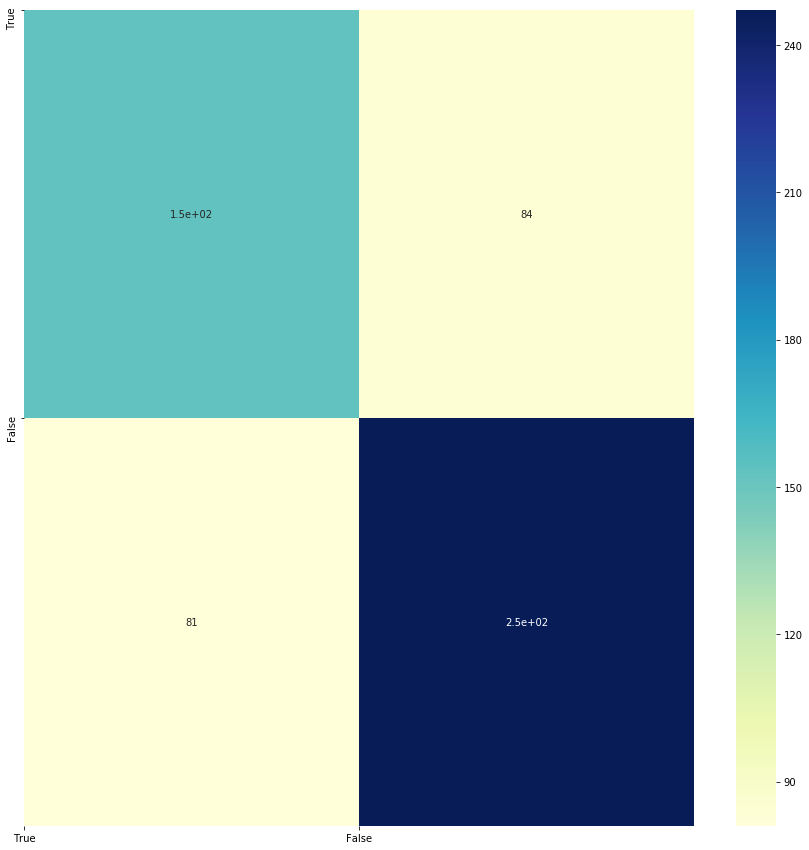

In [80]:
#Random Forest confusion matrix
conf_mat = confusion_matrix(y_valid, predicted_values, label)
plt.figure(figsize=(15,15))
sns.heatmap(conf_mat,annot = True, cmap='YlGnBu')
plt.xticks([0,1],label)
plt.yticks([0,1],label)
plt.show()

In [81]:
data_tuples = list(zip(y_valid,predicted_values))
y_act_vs_y_pred = pd.DataFrame(data_tuples, columns=['True Value','Predicted Value'])
y_act_vs_y_pred.to_excel(r'/home/sukrit/Desktop/Random_Forest_Predictions.xlsx')

In [82]:
finaldata.to_excel(r'/home/sukrit/Desktop/Relevant_Fields.xlsx')